In [106]:

#TODO : REFACTOR
import numpy as np
np.random.seed(42)
import sklearn
import os
#import helper
import keras
import pickle
import math
import collections
from sklearn.metrics import confusion_matrix

from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
%matplotlib inline
import pandas as pd

from tqdm import tqdm

from keras.regularizers import l2

import random
import csv
from tensorflow.contrib.layers import flatten
from skimage import transform as transf

import loader
import preprocess
import plotter
import numpy as np
import pandas as pd
np.random.seed(42)
import sklearn
import os
import keras
import pickle
from skimage import data, img_as_float, exposure, io
from tqdm import tqdm
from scipy import misc
import params
import matplotlib.pyplot as plt
import seaborn as sns
#import collections
import csv
from keras.utils import np_utils
import random
from sklearn.utils import shuffle
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
import plotter
import loader
import preprocess
%matplotlib inline
from IPython.display import HTML


#TODO : REFACTOR
import numpy as np
np.random.seed(42)
import sklearn
import os
from imp import reload
#import helper
import keras
import pickle
import math
import collections
from sklearn.metrics import confusion_matrix
from keras import backend as K

from keras.callbacks import CSVLogger, LearningRateScheduler,Callback,ModelCheckpoint,EarlyStopping,TensorBoard,ReduceLROnPlateau

import matplotlib.pyplot as plt
import seaborn as sns
import collections
import csv
from keras.utils import np_utils
import random
from sklearn.utils import shuffle
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
import plotter
import loader
import preprocess
%matplotlib inline


from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd

from tqdm import tqdm

from keras.regularizers import l2

import random
import csv
from tensorflow.contrib.layers import flatten
from skimage import transform as transf

import loader
import preprocess
import plotter
import Models
import class_helper

#from prettytable import PrettyTable
%matplotlib inline

SEED = 22

#SEED = 22

# Load and Explore Data

In [69]:
#load data

X_train_orig, y_train_orig, X_test_orig, y_test_orig,X_val_orig,y_val_orig = loader.load_split_input_data()
print("data loaded")


Shapes:
X_train: (39209, 32, 32, 3)
X_test: (12630, 32, 32, 3)
X_valid: (4410, 32, 32, 3)
data loaded


## Basic Stats on data
* Number of training examples = 39209
* Number of validation examples = 4410
* Number of testing examples = 12630
* Image data shape = (32, 32, 3)
* Number of classes = 43

In [70]:
#Print basic stats, number of Train, Test, Valid samples

import numpy as np

# Number of training examples
n_train = len(X_train_orig)

# Number of validation examples.
n_validation = len(X_val_orig)

# Number of testing examples.
n_test = len(X_test_orig)

# The shape of a traffic sign image
image_shape = X_train_orig[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train_orig))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [71]:
class_stats = loader.get_class_stats(y_train_orig,y_test_orig,y_val_orig)

In [72]:
#utility class functions
def plot_first_images(first_images):
    
    nr = 10 ; nc = 10
    plt.figure(figsize=(nr,nc))
    for image,i in zip(first_images, range(len(first_images))):
        label = (str(i) + "\n"                                            # class
              + '('+str(class_stats['NumTrain'][i])+')')                              # no. of training samples
              
        plotter.plot_image(image.squeeze(), nr, nc, i+1, label)
    



## Training images, one from each class


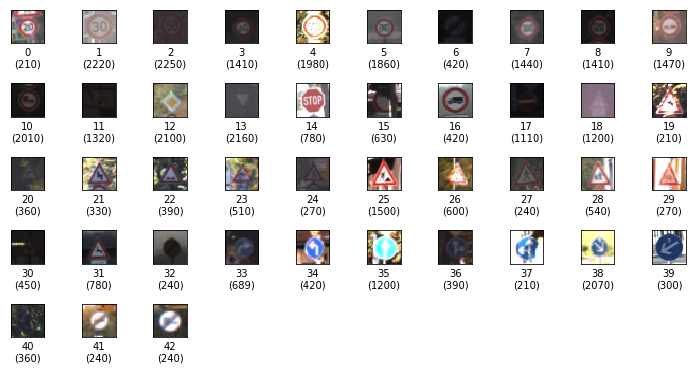

In [73]:
first_imgs = class_helper.get_first_images(X_train_orig,y_train_orig)
plot_first_images(first_imgs)

## Sign Names, counts and percentages of samples per class for Test, Train, Validate datasets

In [74]:
#sign_names=sign_names.round(2)

cm = sns.light_palette("purple", as_cmap=True)
#s = sign_names.style.format({'PerTrain': '{}%', 'PerTrain':'{}%'})
#highlight_max = Styler.highlight_max(subset=None, color='yellow', axis=0)
#format_percent = 
#s = sign_names.style.background_gradient(cmap=cm)

s = class_stats.round(2).copy()
s.columns = ['ClassID','Sign','#Train', '#Test', '#Valid', '%Train','%Test','%Valid']
html = (
    s.style
    .format("{}%", subset=['%Train','%Test','%Valid'])
    #.highlight_max(subset=['NumTrain'])
    .background_gradient(cmap=cm,subset=['#Train','#Test','#Valid','%Train','%Test','%Valid'])
    .render()
)

display(HTML(html))

,ClassID,Sign,#Train,#Test,#Valid,%Train,%Test,%Valid
0,0,Speed limit (20km/h),210,60,30,0.54%,0.48%,0.68%
1,1,Speed limit (30km/h),2220,720,240,5.66%,5.7%,5.44%
2,2,Speed limit (50km/h),2250,750,240,5.74%,5.94%,5.44%
3,3,Speed limit (60km/h),1410,450,150,3.6%,3.56%,3.4%
4,4,Speed limit (70km/h),1980,660,210,5.05%,5.23%,4.76%
5,5,Speed limit (80km/h),1860,630,210,4.74%,4.99%,4.76%
6,6,End of speed limit (80km/h),420,150,60,1.07%,1.19%,1.36%
7,7,Speed limit (100km/h),1440,450,150,3.67%,3.56%,3.4%
8,8,Speed limit (120km/h),1410,450,150,3.6%,3.56%,3.4%
9,9,No passing,1470,480,150,3.75%,3.8%,3.4%


## Visualization 

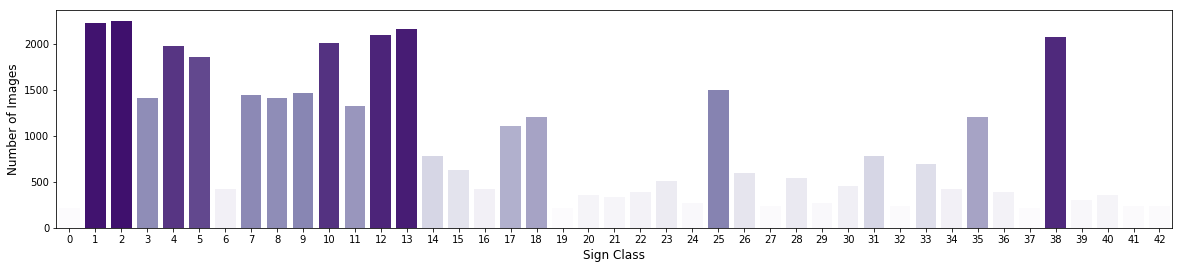

In [75]:
#print(class_stats.head())
plt.figure(figsize=(20,4))
#sns.color_palette("Blues")
#palette=sns.color_palette("Set2", 10)
#palette = sns.color_palette("coolwarm", 7)
norm = plt.Normalize(class_stats['NumTrain'].values.min(), class_stats['NumTrain'].values.max())
palette = plt.cm.Purples(norm(class_stats['NumTrain'])) 
#palette=sns.hls_palette(8, l=.3, s=.8)
sns.barplot(class_stats['ClassId'].values, class_stats['NumTrain'].values,palette=palette)
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

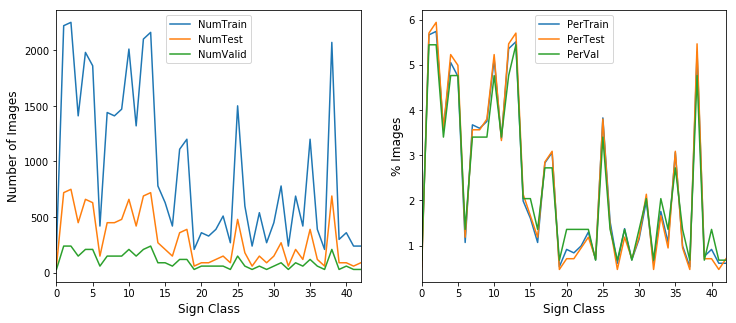

In [76]:



fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12, 5), sharey=False)


class_stats.loc[:, 'NumTrain':'NumValid'].plot(ax=ax0)
class_stats.loc[:, 'PerTrain':'PerVal'].plot(ax=ax1)

ax0.set_xlabel('Sign Class', fontsize=12)
ax0.set_ylabel('Number of Images', fontsize=12)

ax1.set_xlabel('Sign Class', fontsize=12)
ax1.set_ylabel('% Images', fontsize=12)



#print(class_stats)


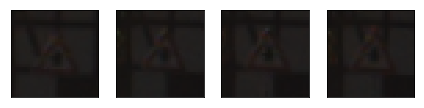

In [77]:

class_11_images = class_helper.get_images_for_class(11,X_train_orig, y_train_orig)
for i in range(4):
    plotter.plot_image(class_11_images[i], 1, 4, i+1)

In [78]:
mean = np.mean(X_train_orig)
std = np.std(X_train_orig)
dark, bright, dark_mean, bright_mean = plotter.get_dark_bright_imgs(class_11_images[:100],mean,std)
print('Number of dark images: '+str(len(dark)))
print('Number of bright images: '+str(len(bright)))


Number of dark images: 52
Number of bright images: 48


There are 52 images in the  dataset


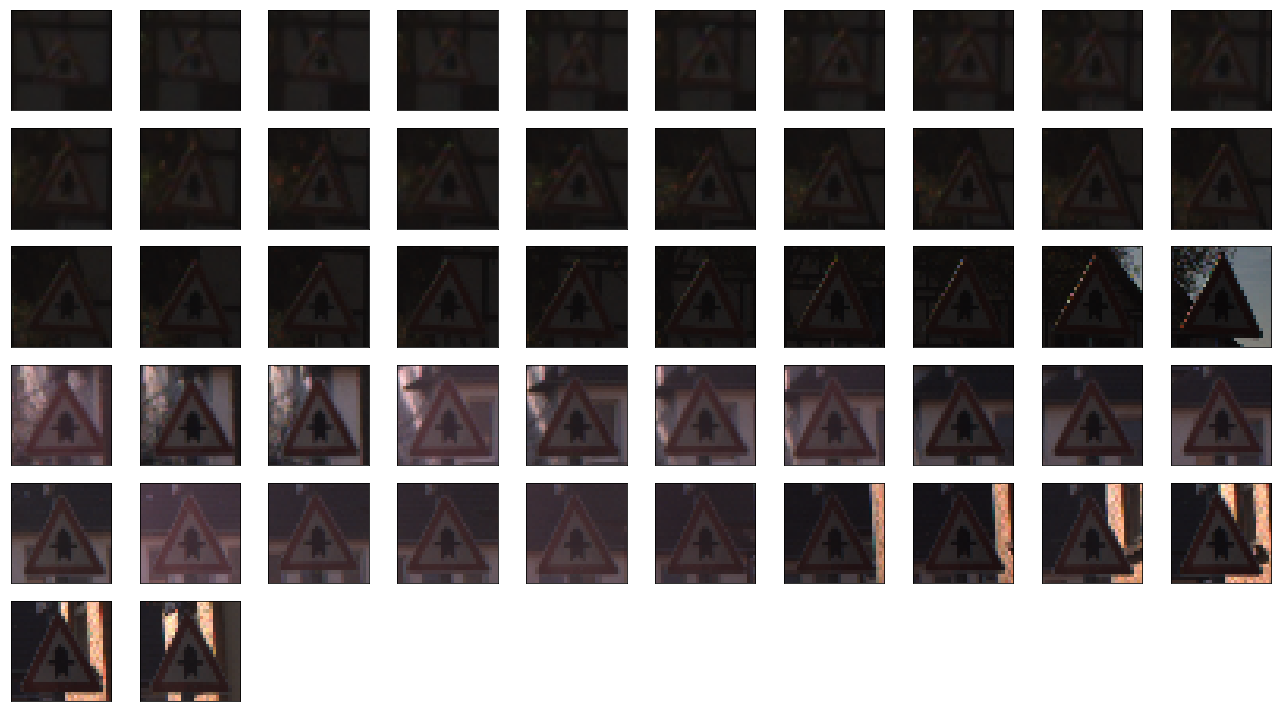

In [79]:

plotter.plot_images(-1,dark,10,"")

There are 48 images in the  dataset


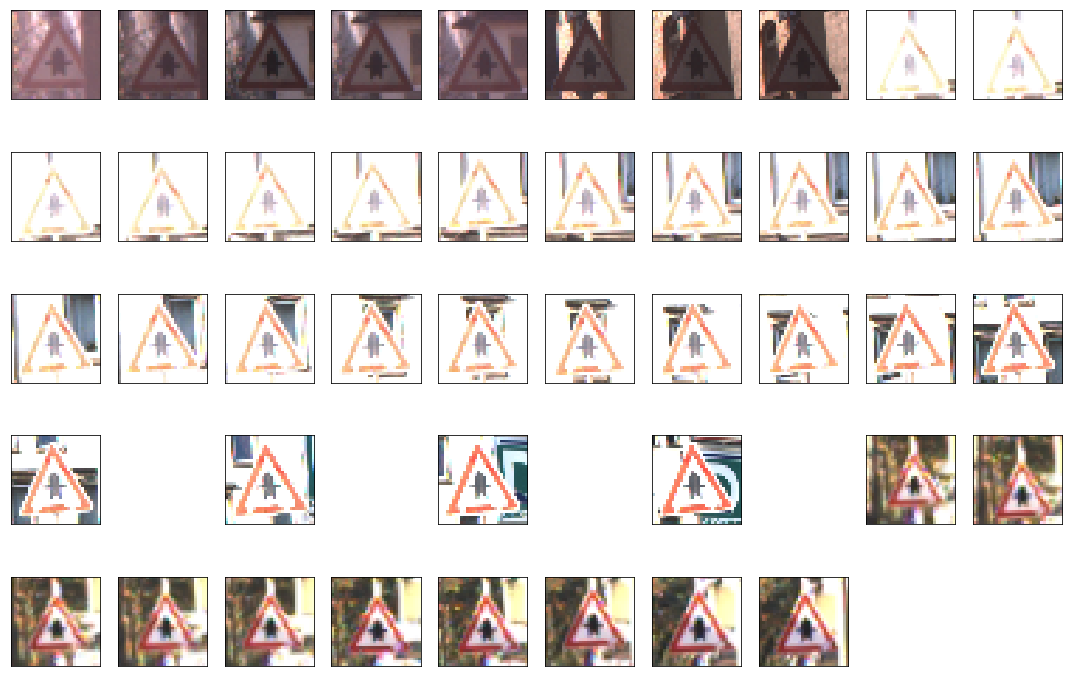

In [80]:
plotter.plot_images(-1,bright,10,"")

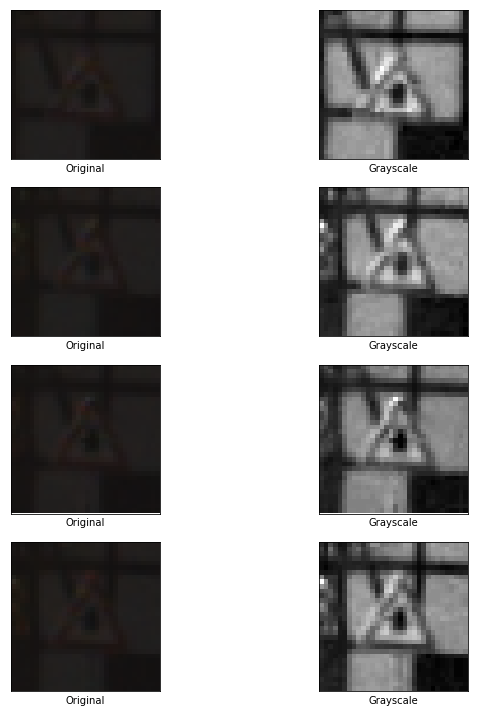

In [300]:
plotter.plot_2_datasets(np.asarray(dark[0:4]), preprocess.conv_to_grayscale_data(np.asarray(dark[0:4])),'Original', 'Grayscale')

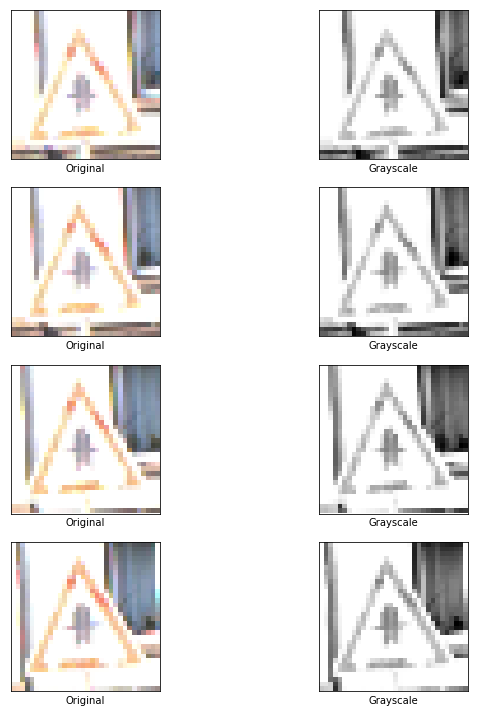

In [299]:
plotter.plot_2_datasets(np.asarray(bright[16:20]), preprocess.conv_to_grayscale_data(np.asarray(bright[16:20])),'Original','Grayscale')


In [83]:
img_dark = dark[0]
img_bright = bright[8]
img_dark_gry = preprocess.conv_to_grayscale_img(img_dark)
img_bright_gry = preprocess.conv_to_grayscale_img(img_bright)

In [84]:
#utility function to help  visualize
def plot_equalize_color_gray(img_dark_equal, img_dark_equal_gry, img_bright_equal, img_bright_equal_gry,op):
    plotter.plot_image(img_dark, 2,4,1, "Original Dark")
    plotter.plot_image(img_dark_equal, 2,4,2,op+" Dark")
    plotter.plot_image(img_dark_gry, 2,4,3, "Original Dark Grey")

    plotter.plot_image(img_dark_equal_gry,2,4,4, op+" Dark Grey")
    plotter.plot_image(img_bright, 2,4,5, "Original Bright")
    plotter.plot_image(img_bright_equal,2,4,6, op+" Bright")
    plotter.plot_image(img_bright_gry, 2,4,7, "Original Bright Grey")

    plotter.plot_image(img_bright_equal_gry,2,4,8, op+" Bright Grey")




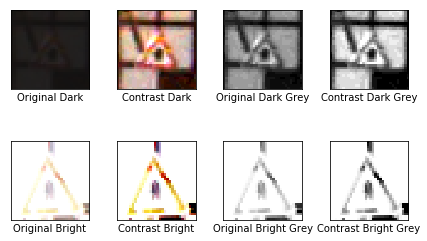

In [85]:
img_dark_contrast = preprocess.contrast_stretch_img(img_dark)
img_bright_contrast = preprocess.contrast_stretch_img(img_bright)
img_dark_contrast_gry = preprocess.contrast_stretch_img(img_dark_gry)
img_bright_contrast_gry = preprocess.contrast_stretch_img(img_bright_gry)


plot_equalize_color_gray(img_dark_contrast,img_dark_contrast_gry,img_bright_contrast,img_bright_contrast_gry,"Contrast")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


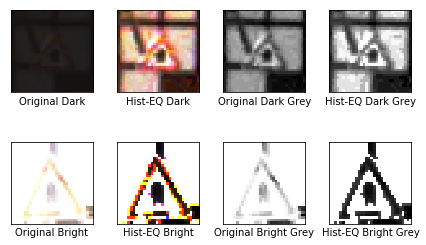

In [86]:
img_dark_hist = preprocess.hist_equalize_img(img_dark)
img_bright_hist = preprocess.hist_equalize_img(img_bright)
img_dark_hist_gry = preprocess.hist_equalize_img(img_dark_gry)
img_bright_hist_gry = preprocess.hist_equalize_img(img_bright_gry)
plot_equalize_color_gray(img_dark_hist,img_dark_hist_gry,img_bright_hist,img_bright_hist_gry,"Hist-EQ")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


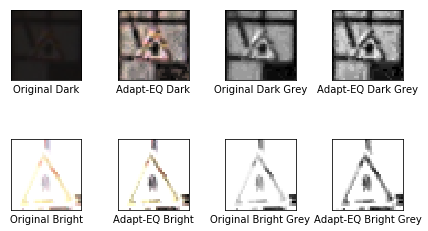

In [87]:
img_dark_adapteq = preprocess.adaptive_equalize_img(img_dark)
img_bright_adapteq = preprocess.adaptive_equalize_img(img_bright)
img_dark_adapteq_gry = preprocess.adaptive_equalize_img(img_dark_gry)
img_bright_adapteq_gry = preprocess.adaptive_equalize_img(img_bright_gry)
plot_equalize_color_gray(img_dark_adapteq,img_dark_adapteq_gry,img_bright_adapteq,img_bright_adapteq_gry,"Adapt-EQ")

In [88]:
#referenced from 

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [89]:
#### Everything below here is just to create the plot/graphs ####
# Display results
def hist_compare(img, img_contrast, img_hist, img_adapteq):
    fig = plt.figure(figsize=(10, 7)) 
    axes = np.zeros((2, 4), dtype=np.object)
    axes[0, 0] = fig.add_subplot(2, 4, 1)

    for i in range(1, 4):
        axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])

    for i in range(0, 4):
        axes[1, i] = fig.add_subplot(2, 4, 5+i)

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Low contrast image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')

    ax_hist.set_yticks(np.linspace(0, y_max, 5))
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_contrast, axes[:, 1])
    ax_img.set_title('Contrast stretching')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_hist, axes[:, 2])
    ax_img.set_title('Histogram equalization')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
    ax_img.set_title('Adaptive equalization')
    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

    # prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


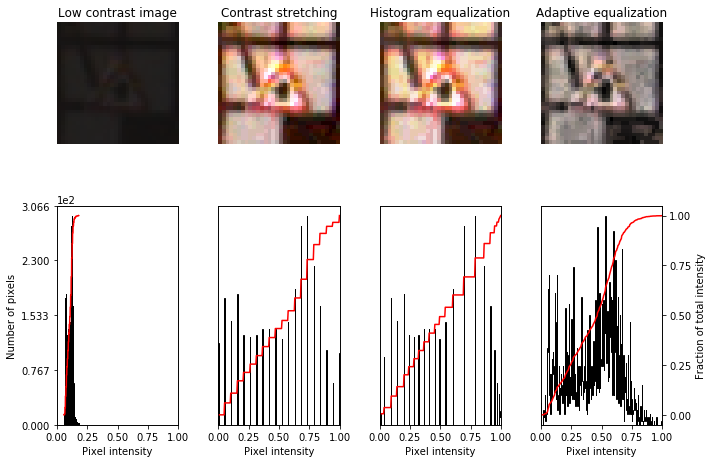

In [90]:
hist_compare(img_dark, img_dark_contrast, img_dark_hist, img_dark_adapteq)


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


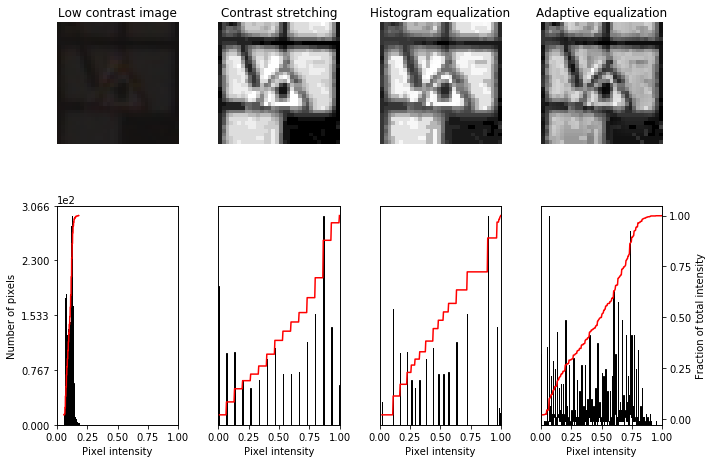

In [91]:
hist_compare(img_dark, img_dark_contrast_gry, img_dark_hist_gry, img_dark_adapteq_gry)


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


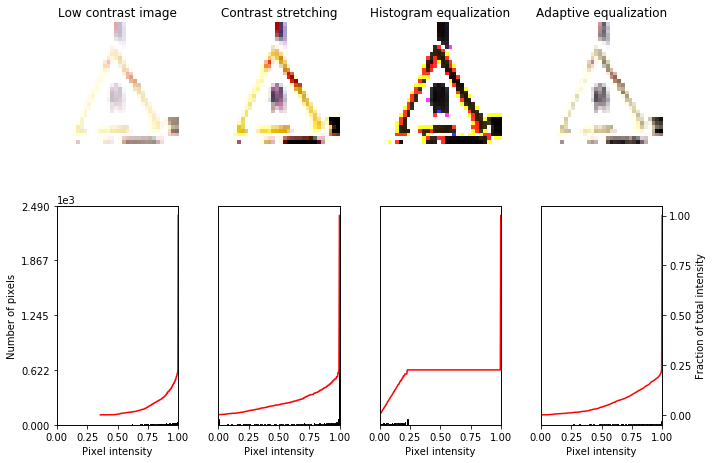

In [92]:
hist_compare(img_bright, img_bright_contrast, img_bright_hist, img_bright_adapteq)


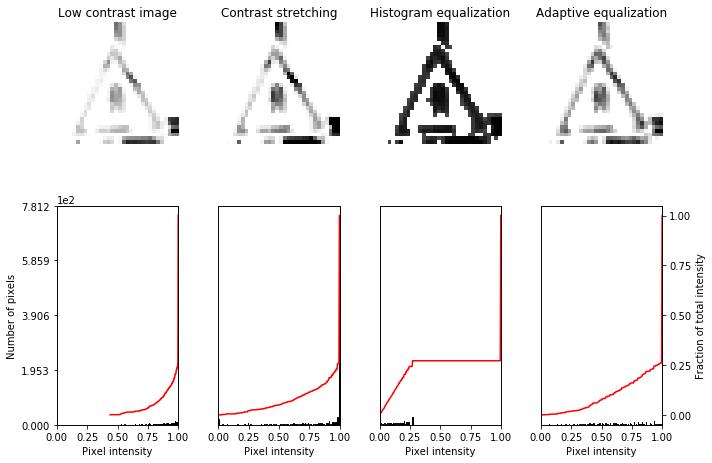

In [93]:
hist_compare(img_bright_gry, img_bright_contrast_gry, img_bright_hist_gry, img_bright_adapteq_gry)


# Preprocess

In [94]:
X_train,y_train,X_test,y_test,X_val,y_val= preprocess.preprocess_aug_combine_save(X_train_orig,y_train_orig,X_test_orig,y_test_orig,X_val_orig,y_val_orig)

#clear unused variables
del X_train_orig
del y_train_orig
del X_test_orig
del y_test_orig
del X_val_orig
del y_val_orig

Converting to Grayscale
X_train RGB shape: (39209, 32, 32, 3)
X_train Grayscale shape: (39209, 32, 32, 1)


NameError: name 'printing' is not defined

In [95]:
loader = reload(loader)
preprocess = reload(preprocess)

X_train,y_train,X_test,y_test,X_val,y_val=loader.load_combine_preprocessed("hae")




Loading data ...
preprocessed\preprocessed_hset_aug_gray.p
X_aug_all:  8600
y_aug_all:  8600
Data and modules loaded.
preprocessed\preprocessed_hist_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
preprocessed\preprocessed_hae_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
preprocessed\preprocessed_hcs_gray.p
X_train:  34799
y_train:  34799
X_val:  4410
y_val:  4410
X_test:  12630
y_test:  12630
Data and modules loaded.
combining dataset 0 of type <class 'numpy.ndarray'> and length 8600
combining dataset 1 of type <class 'numpy.ndarray'> and length 34799
combining dataset 2 of type <class 'numpy.ndarray'> and length 34799
combining dataset 3 of type <class 'numpy.ndarray'> and length 34799
length of combined set : 112997


In [96]:
#one hot  encoding of y series
y_train_e= np_utils.to_categorical(y_train,num_classes=params.n_classes)
y_val_e = np_utils.to_categorical(y_val,num_classes=params.n_classes)
y_test_e = np_utils.to_categorical(y_test,num_classes=params.n_classes)

In [ ]:
def save_model_history(label,model_dir,history) :
    suffix='.log'
    
    filename = os.path.join(model_dir,'history_'+label+suffix)
    
    with open(filename, 'wb') as f:
        pickle.dump(history, f)
    print("History saved in file "+filename)
    

import tensorflow as tf
class LearningRateTracker(Callback):
    def __init__(self,model):
        
        self.model = model
        
    def on_epoch_end(self, epoch, logs={}):
        
        # _lr = K.get_value(tf.to_float(model.optimizer.lr, name='ToFloat'))
        # _decay = tf.to_float(model.optimizer.decay, name='ToFloat')
        #_iter = tf.to_float(model.optimizer.iterations, name='ToFloat')
        
        lr = K.get_value(self.model.optimizer.lr)
        
        print("\nCurrent learning rate: "+str(lr))

                    
def train_model_(model,label,flag_earlystop=True,flag_reduceLR=True, flag_lrsched=False,flag_tensorboard=True):
    
    cwd =os.getcwd()
    print("CWD: "+str(cwd))
    model_dir = os.path.join(cwd,params.model_dir,label)
    #model_dir = os.path.join(params.model_dir,label)
    print(model_dir)
    if not os.path.exists(model_dir):
        try:
            print("create new dir")
            os.makedirs(model_dir)
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                print("error !!!")
                raise

    else:
        print("dir exists")
    
    # Compile and train the model
    suffix = '.hdf5'
    weights_file = os.path.join(model_dir,'weights_'+label+suffix)
    print(weights_file)
    
    adam = Adam()
    callbacks=[]
    if (flag_tensorboard==True):
        tensorboard=TensorBoard(log_dir=model_dir, histogram_freq=0, batch_size=512, write_graph=True)
        callbacks.append(tensorboard)

    if (flag_earlystop == True):
        early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5 , verbose=2, mode='auto')
        callbacks.append(early_stop)
        
    if (flag_reduceLR == True):
        flag_lrsched=False
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=4, min_lr=0.000001)
        callbacks.append(reduce_lr)

    #lr =  K.get_value(model.optimizer.lr)
    
    
    
    #lr = 0.0001
    if (flag_lrsched == True):
        lr = 0.01
       
        adam=Adam(lr=lr)
        def lr_schedule(epoch):
            #print("-----------------------------epoch : "+str(epoch))
            #print (lr*(0.1 ** int(epoch / 4)))
            return lr * (0.1 ** int(epoch / 4))

        lr_sched = LearningRateScheduler(lr_schedule)
        callbacks.append(lr_sched)
    
    model.compile(loss='categorical_crossentropy',
          optimizer=adam,
          metrics=['accuracy'])
    print("starting LR:"+str(K.get_value(model.optimizer.lr)))
    trackLR = LearningRateTracker(model)
    
    csv_logger = CSVLogger(os.path.join(model_dir,'training.log'), append=True)
    checkpointer = ModelCheckpoint(filepath=weights_file, verbose=2, save_best_only=True, save_weights_only=True)
    callbacks.append(csv_logger)
    callbacks.append(checkpointer)
    callbacks.append(trackLR)
    
    print("CALLBACKS : "+str(callbacks))
    try:

        history = model.fit(X_train[:10], y_train_e[:10],
                    batch_size=512, epochs=20,
                    #callbacks=[checkpointer,early_stop,lr_sched],
                    callbacks=callbacks,
                    shuffle=False,
                    verbose=1, validation_data=(X_val[:10], y_val_e[:10]))

    except KeyboardInterrupt:
        print("training interrupted")

    #print(history.history)
    evaluate = model.evaluate(X_test,y_test_e)
    print("---------------------------------------")
    print(evaluate)
    save_model_history(label,model_dir,history)

    return  history, evaluate


## Visualize Model output between Layers

model\BN_No_STN\training.log
['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
[]
['0', '0.0', '5.56194162369', '0.0', '3.70891869068']
[]
{'acc': [0.70669132810048851, 0.95135269078731355, 0.97416745577790953, 0.98111454286502486, 0.98526509553667463, 0.98888466065523517, 0.98970769135780268, 0.99169004486897527, 0.99199093781303582, 0.99188474030494989, 0.99438923157357462, 0.99353965149622736, 0.99433613281874045, 0.99375204651714666, 0.99409718842251404, 0.99359275025106164, 0.99400869049884533, 0.99484057098966527, 0.9955397045949822, 0.99538925812189705], 'val_acc': [0.20952381033475706, 0.94603175024867325, 0.98979592101644231, 0.99138321995464851, 0.99092970732388308, 0.99455782312925167, 0.9938775510204082, 0.99523809523809526, 0.98979592101644231, 0.994104311039118, 0.99591836734693873, 0.995011340517576, 0.99206349471258737, 0.99297052419104548, 0.99365079365079367, 0.99319728420975528, 0.995011340517576, 0.98956916413339624, 0.99115646523412937, 0.99274376522656738], 'val_los

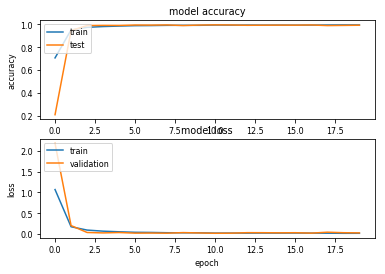

In [97]:
import csv

label = "BN_No_STN"
suffix = '.log'
no_stn_his_f = os.path.join(params.model_dir,label,'training.log')
print(no_stn_his_f)

#file = open(no_stn_his_f,'rb')
with open(no_stn_his_f, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
#model_history = pickle.load(file)
#file.close()

print(model_history)

plt.figure(1)  
plt.subplot(211)  
plt.plot(model_history['acc'])  
plt.plot(model_history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(model_history['loss'])  
plt.plot(model_history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()  



In [9]:
model = Models.deep_cnn_model(flag_BN=True,flag_STN=False)
history,evaluate= train_model_(model,"BN_No_STN",flag_earlystop=False,flag_reduceLR=False, flag_lrsched=False,flag_tensorboard=True)


CWD: /home/carnd/KerasTrafficSignClassifier
/home/carnd/KerasTrafficSignClassifier/model/BN_No_STN
/home/carnd/KerasTrafficSignClassifier/model/BN_No_STN/weights_BN_No_STN.hdf5
starting LR:0.001
CALLBACKS : [<keras.callbacks.TensorBoard object at 0x7f1c52fc1ac8>, <keras.callbacks.CSVLogger object at 0x7f1c52fe5358>, <keras.callbacks.ModelCheckpoint object at 0x7f1c52fe5d30>, <__main__.LearningRateTracker object at 0x7f1c52fe5828>]
Train on 112997 samples, validate on 4410 samples
Epoch 1/20
112640/112997 [============================>.] - ETA: 0s - loss: 1.3172 - acc: 0.6293Epoch 00000: val_loss improved from inf to 3.42156, saving model to /home/carnd/KerasTrafficSignClassifier/model/BN_No_STN/weights_BN_No_STN.hdf5

Current learning rate: 0.001
112997/112997 [==============================] - 61s - loss: 1.3147 - acc: 0.6301 - val_loss: 3.4216 - val_acc: 0.1181
Epoch 2/20
112640/112997 [============================>.] - ETA: 0s - loss: 0.3432 - acc: 0.8931Epoch 00001: val_loss improv

In [13]:
model2 = Models.deep_cnn_model(flag_BN=True,flag_STN=True)
history2,evaluate2= train_model_(model2,"BN_STN_001",flag_earlystop=False,flag_reduceLR=False, flag_lrsched=False,flag_tensorboard=True)


CWD: /home/carnd/KerasTrafficSignClassifier
/home/carnd/KerasTrafficSignClassifier/model/BN_STN_001
/home/carnd/KerasTrafficSignClassifier/model/BN_STN_001/weights_BN_STN_001.hdf5
starting LR:0.001
CALLBACKS : [<keras.callbacks.TensorBoard object at 0x7f1c2a7db198>, <keras.callbacks.CSVLogger object at 0x7f1c2a7fc048>, <keras.callbacks.ModelCheckpoint object at 0x7f1c2a7fc4e0>, <__main__.LearningRateTracker object at 0x7f1c2a7fc390>]
Train on 112997 samples, validate on 4410 samples
Epoch 1/20
112640/112997 [============================>.] - ETA: 0s - loss: 1.0738 - acc: 0.7060Epoch 00000: val_loss improved from inf to 2.18488, saving model to /home/carnd/KerasTrafficSignClassifier/model/BN_STN_001/weights_BN_STN_001.hdf5

Current learning rate: 0.001
112997/112997 [==============================] - 77s - loss: 1.0711 - acc: 0.7067 - val_loss: 2.1849 - val_acc: 0.2095
Epoch 2/20
112640/112997 [============================>.] - ETA: 0s - loss: 0.1725 - acc: 0.9513Epoch 00001: val_loss i

In [448]:
model3 = Models.deep_cnn_model(flag_BN=True,flag_STN=True)
history3,evaluate3= train_model_(model3,"BN_STN_001_reduceLR",flag_earlystop=True,flag_reduceLR=True, flag_lrsched=False,flag_tensorboard=True)


CWD: C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB
C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB\model\BN_STN_001_reduceLR
dir exists
C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB\model\BN_STN_001_reduceLR\weights_BN_STN_001_reduceLR.hdf5
starting LR:0.001
CALLBACKS : [<keras.callbacks.TensorBoard object at 0x00000195008CD8D0>, <keras.callbacks.EarlyStopping object at 0x00000195008CE5F8>, <keras.callbacks.ReduceLROnPlateau object at 0x00000195008CE6A0>, <keras.callbacks.CSVLogger object at 0x0000019574E23F60>, <keras.callbacks.ModelCheckpoint object at 0x0000019574E3DC50>, <__main__.LearningRateTracker object at 0x000001957A101198>]
Train on 10 samples, validate on 10 samples


Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt


Epoch 1/20
Epoch 00000: val_loss improved from inf to 3.76287, saving model to C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB\model\BN_STN_001_reduceLR\weights_BN_STN_001_reduceLR.hdf5

Current learning rate: 0.001
10/10 [==============================] - 3s - loss: 3.4079 - acc: 0.0000e+00 - val_loss: 3.7629 - val_acc: 0.0000e+00
Epoch 2/20
Epoch 00001: val_loss improved from 3.76287 to 3.74186, saving model to C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB\model\BN_STN_001_reduceLR\weights_BN_STN_001_reduceLR.hdf5

Current learning rate: 0.001
10/10 [==============================] - 0s - loss: 4.3486 - acc: 0.1000 - val_loss: 3.7419 - val_acc: 0.0000e+00
Epoch 3/20
Epoch 00002: val_loss improved from 3.74186 to 3.72705, saving model to C:\Users\Sarita Navuluru\ml\capstone\KerasGTSB\model\BN_STN_001_reduceLR\weights_BN_STN_001_reduceLR.hdf5

Current learning rate: 0.001
10/10 [==============================] - 0s - loss: 2.8209 - acc: 0.1000 - val_loss: 3.7270 - val_acc: 0.0000e+00
E

KeyboardInterrupt: 

In [ ]:
Xresult = F([X_batch[:9]])
#print(Xresult)
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    image = np.squeeze(Xresult[0][i])
    plt.imshow(image, cmap= 'gray')
    plt.axis('off')
fig.canvas.draw()
plt.show()

## Training Accuracy, Loss Plots

model\BN_STN_001\history_BN_STN_001.log
{'acc': [0.70669132810048851, 0.95135269078731355, 0.97416745577790953, 0.98111454286502486, 0.98526509553667463, 0.98888466065523517, 0.98970769135780268, 0.99169004486897527, 0.99199093781303582, 0.99188474030494989, 0.99438923157357462, 0.99353965149622736, 0.99433613281874045, 0.99375204651714666, 0.99409718842251404, 0.99359275025106164, 0.99400869049884533, 0.99484057098966527, 0.9955397045949822, 0.99538925812189705], 'val_acc': [0.20952381033475706, 0.94603175024867325, 0.98979592101644231, 0.99138321995464851, 0.99092970732388308, 0.99455782312925167, 0.9938775510204082, 0.99523809523809526, 0.98979592101644231, 0.994104311039118, 0.99591836734693873, 0.995011340517576, 0.99206349471258737, 0.99297052419104548, 0.99365079365079367, 0.99319728420975528, 0.995011340517576, 0.98956916413339624, 0.99115646523412937, 0.99274376522656738], 'val_loss': [2.1848759523595001, 0.20108071486560666, 0.03390896707317051, 0.023745084733041235, 0.032614

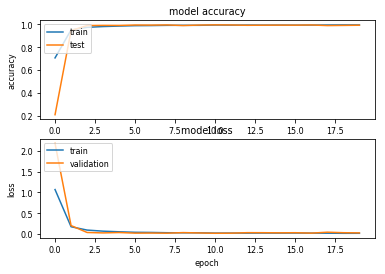

In [63]:
label = "BN_STN_001"
suffix = '.log'
no_stn_his_f = os.path.join(params.model_dir,label,'history_'+label+suffix)
print(no_stn_his_f)

file = open(no_stn_his_f,'rb')
model_history = pickle.load(file)
file.close()

print(model_history)

plt.figure(1)  
plt.subplot(211)  
plt.plot(model_history['acc'])  
plt.plot(model_history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(model_history['loss'])  
plt.plot(model_history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()  



# Test and Evaluate

In [244]:

#load models
from keras.models import load_model
import Models 


#model_deep= load_model('deep_cnn_89_all_aug_on_hae.h5',custom_objects={'STN':SpatialTransformer})

print("loading model ")
label = "BN_STN_001_reduceLR"
weights_file = os.path.join(params.model_dir,label,"weights_"+label+".hdf5")
print(weights_file)
#weights_file="weights_deep_cnn_98.hdf5"
model = Models.deep_cnn_model(flag_BN=True,flag_STN=True)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


model.load_weights(weights_file)

print("Evaluating")
#load the best model 
#evaluate= model.evaluate(X_test,y_test_e,verbose=True)
#prob = model.predict(X_test)
#predictions = np.argmax(prob, axis=1)
#print(predictions)

loading model 
model\BN_STN_001_reduceLR\weights_BN_STN_001_reduceLR.hdf5
Evaluating


In [100]:
print(evaluate)
print(X_test.shape)
print(prob)
print(predictions)

[0.056600172527838499, 0.98590657170198304]
(12630, 32, 32, 1)
[[  2.61761290e-11   8.33697430e-15   1.43859695e-18 ...,   1.02589924e-11
    1.11975854e-11   1.12836539e-13]
 [  8.43931587e-13   1.00000000e+00   9.50328005e-14 ...,   2.54187049e-21
    5.61371293e-22   4.53036151e-18]
 [  1.49067314e-10   1.48986878e-10   1.94238431e-10 ...,   8.80981746e-12
    9.48021043e-15   1.84177584e-13]
 ..., 
 [  8.44951046e-06   1.73337255e-02   1.86008754e-06 ...,   1.70716843e-11
    1.40377722e-06   8.97205994e-03]
 [  2.26910040e-19   3.38556422e-15   4.00442926e-16 ...,   9.99720562e-18
    1.75365647e-22   6.22118542e-16]
 [  2.33229410e-16   8.78993655e-13   5.82668679e-12 ...,   6.13495810e-10
    5.19625372e-14   1.11093614e-08]]
[16  1 38 ...,  5  7 10]


In [107]:
error_indices = np.where(predictions!=y_test)[0]
#print(error_indices)
numErrors = error_indices.shape[0]
print ("No of wrong predictions: ", numErrors)
error_classes = [y_test[i] for i in error_indices]
df_error_truth = pd.DataFrame.from_dict(collections.Counter(error_classes), orient='index')
#print(df_error_truth)

#print((df_errors).shape)
df_error_truth = df_error_truth.rename(columns={0:'Errors'})
#print(df_errors)

class_stats['Errors'] = df_error_truth['Errors']
class_stats.fillna(value=0, inplace=True)
class_stats['Error%'] = ((class_stats['Errors']/class_stats['NumTest'])*100).round(2)
class_stats['Error%Train'] = ((class_stats['Errors']/class_stats['NumTrain'])*100).round(2)


No of wrong predictions:  267


In [140]:
cm = sns.light_palette("purple", as_cmap=True)
#s = sign_names.style.format({'PerTrain': '{}%', 'PerTrain':'{}%'})
#highlight_max = Styler.highlight_max(subset=None, color='yellow', axis=0)
#format_percent = 
#s = sign_names.style.background_gradient(cmap=cm)

s = (class_stats[['ClassId','SignName','NumTrain','NumTest','NumValid','Errors','Error%','Error%Train']].
round(2).copy())
s.columns = ['ClassID','Sign','#Train', '#Test', '#Valid','Errors','%Error','%Error(Train)']
html = (
    s.style
    .format("{}%", subset=['%Error','%Error(Train)'])
    #.highlight_max(subset=['NumTrain'])
    .background_gradient(cmap=cm,subset=['#Train','#Test','#Valid','Errors','%Error','%Error(Train)'])
    .render()
)

display(HTML(html))
del html
del s


,ClassID,Sign,#Train,#Test,#Valid,Errors,%Error,%Error(Train)
0,0,Speed limit (20km/h),210,60,30,0,0.0%,0.0%
1,1,Speed limit (30km/h),2220,720,240,3,0.42%,0.14%
2,2,Speed limit (50km/h),2250,750,240,2,0.27%,0.09%
3,3,Speed limit (60km/h),1410,450,150,14,3.11%,0.99%
4,4,Speed limit (70km/h),1980,660,210,5,0.76%,0.25%
5,5,Speed limit (80km/h),1860,630,210,8,1.27%,0.43%
6,6,End of speed limit (80km/h),420,150,60,11,7.33%,2.62%
7,7,Speed limit (100km/h),1440,450,150,1,0.22%,0.07%
8,8,Speed limit (120km/h),1410,450,150,17,3.78%,1.21%
9,9,No passing,1470,480,150,0,0.0%,0.0%


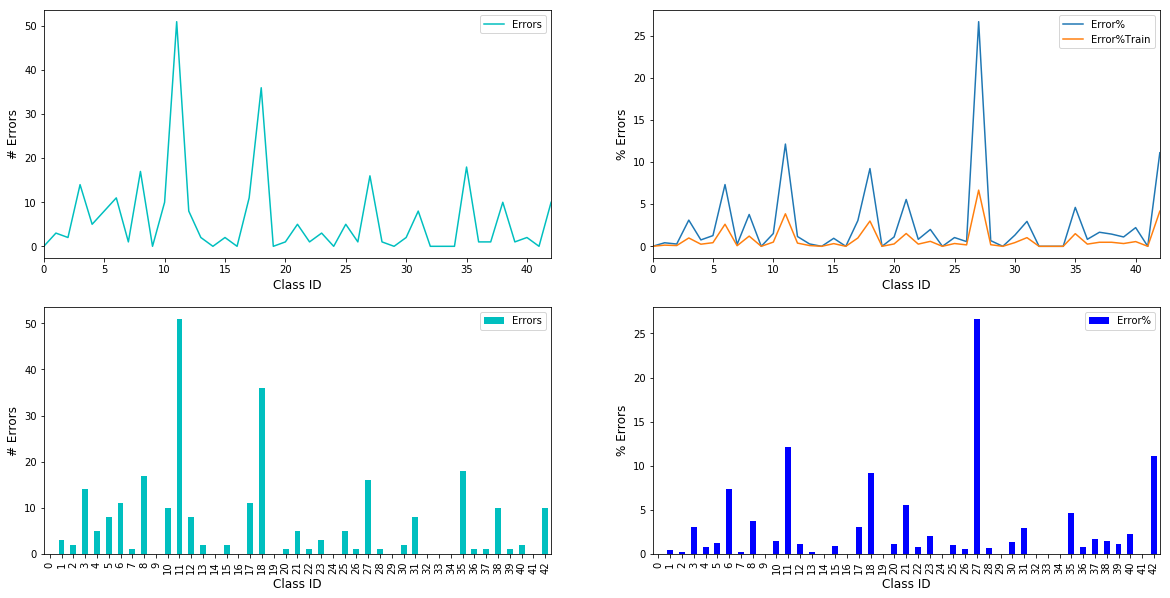

In [109]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(ncols=2,nrows=2,figsize=(20, 10), sharey=False)


class_stats[['Errors']].plot(ax=ax2,kind='bar',color = 'c')
class_stats[['Error%']].plot(ax=ax3,kind='bar',color = 'b')
class_stats[['Errors']].plot(ax=ax0,kind='line',color = 'c')
class_stats[['Error%','Error%Train']].plot(ax=ax1,kind='line')


ax0.set_xlabel('Class ID', fontsize=12)
ax0.set_ylabel('# Errors', fontsize=12)

ax1.set_xlabel('Class ID', fontsize=12)
ax1.set_ylabel('% Errors', fontsize=12)


ax2.set_xlabel('Class ID', fontsize=12)
ax2.set_ylabel('# Errors', fontsize=12)

ax3.set_xlabel('Class ID', fontsize=12)
ax3.set_ylabel('% Errors', fontsize=12)

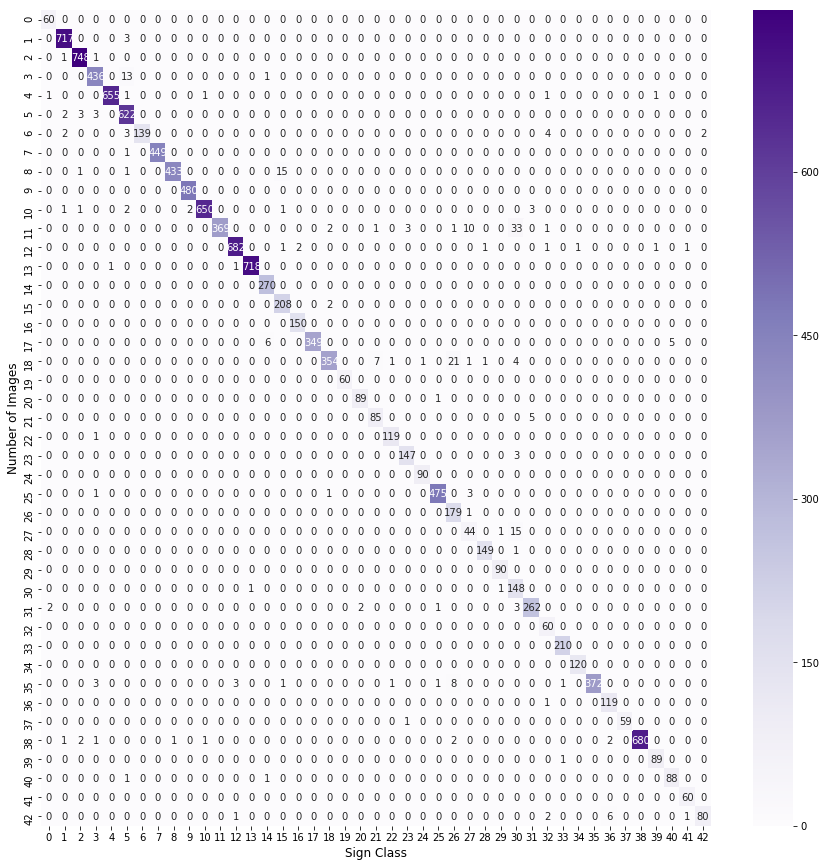

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches




palette = sns.color_palette('Purples')

cm = confusion_matrix(y_test, predictions)
#colormap = ListedColormap(palette.as_hex())

#cm = cm.pivot("Truth", "Predictions", "Errors")
ax = sns.heatmap(cm,annot=True, fmt="d", ax=ax,cmap="Purples")
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Truth', fontsize=12)
plt.show()

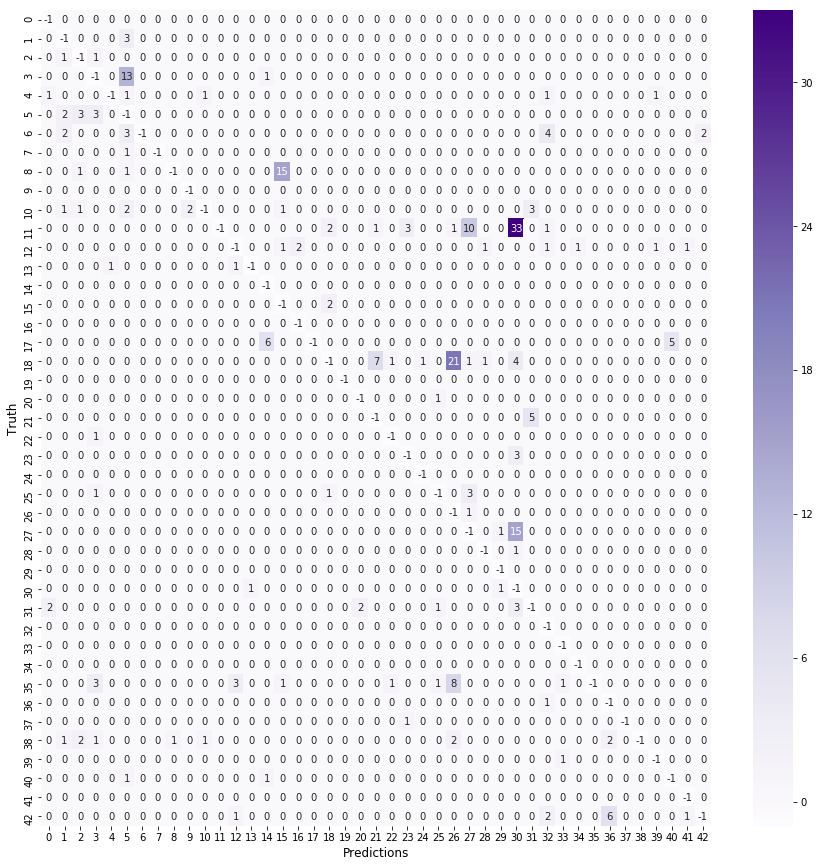

In [236]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

palette = sns.color_palette('Purples')

cm = confusion_matrix(y_test, predictions)
#colormap = ListedColormap(palette.as_hex())


np.fill_diagonal(cm,-1)

ax = sns.heatmap(cm,annot=True, fmt="d", ax=ax,cmap="Purples")
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Truth', fontsize=12)
plt.show()

In [228]:
#df = sklearn.metrics.classification_report( labels=None, target_names=None, sample_weight=None, digits=2)
df1 = sklearn.metrics.precision_recall_fscore_support(y_test, predictions, labels=None, average=None,  sample_weight=None)
class_stats["F1"] = df1[2]
class_stats["Precision"] = df1[0]
#print(class_stats)

np.fill_diagonal(cm,0)


max_misclassified_class =  np.argmax(cm, axis=1)
#replace accurate classes with 'NA'
max_misclassified_class_errors =  np.amax(cm, axis=1)
print(max_misclassified_class_errors)
per=np.zeros(n_classes)
for i in range(n_classes):

    if (max_misclassified_class_errors[i] == 0):

        max_misclassified_class[i]= -1
        per[i]= np.nan
    else:
        per[i]=(max_misclassified_class_errors[i]/(class_stats.iloc[i]["NumTest"]-class_stats.iloc[i]["Errors"]))*100

class_stats["Max_Misclassified_as"]=max_misclassified_class
class_stats["Max_Misclassified_Class_%"] = per


[ 0  3  1 13  1  3  4  1 15  0  3 33  2  1  0  2  0  6 21  0  1  5  1  3  0
  3  1 15  1  0  1  3  0  0  0  8  1  1  2  1  1  0  6]


In [263]:



s = (class_stats[["SignName","F1","Precision","Max_Misclassified_as","Max_Misclassified_Class_%"]]
.round(2).copy())
s.columns = ['Sign','Accuracy(F1)', 'Precision', 'Max Misclassified as','%Max_Misclassified_Class']
html = (
    s.style
    .format("{}%", subset=['%Max_Misclassified_Class'])
    #.highlight_max(subset=['NumTrain'])
    .background_gradient(cmap="Purples",subset=['Accuracy(F1)','Precision','%Max_Misclassified_Class'])
    .render()
)

display(HTML(html))
del html
del s





C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


,Sign,Accuracy(F1),Precision,Max Misclassified as,%Max_Misclassified_Class
0,Speed limit (20km/h),0.98,0.95,-1,nan%
1,Speed limit (30km/h),0.99,0.99,5,0.42%
2,Speed limit (50km/h),0.99,0.99,1,0.13%
3,Speed limit (60km/h),0.97,0.98,5,2.98%
4,Speed limit (70km/h),1,1,0,0.15%
5,Speed limit (80km/h),0.97,0.96,2,0.48%
6,End of speed limit (80km/h),0.96,1,32,2.88%
7,Speed limit (100km/h),1,1,5,0.22%
8,Speed limit (120km/h),0.98,1,15,3.46%
9,No passing,1,1,-1,nan%


Pedestrians :


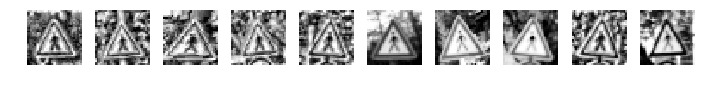

was misclassified as:
Beware of ice/snow :


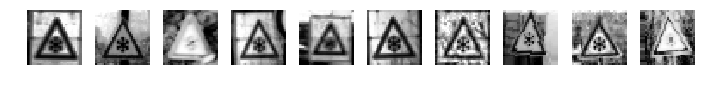

Right-of-way at the next intersection :


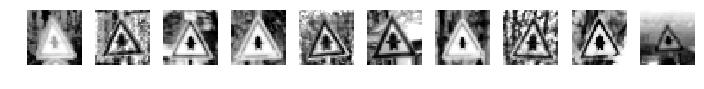

was misclassified as:
Beware of ice/snow :


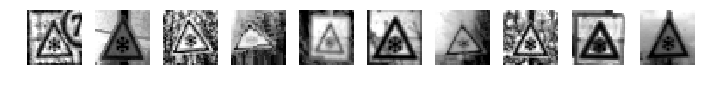

General caution :


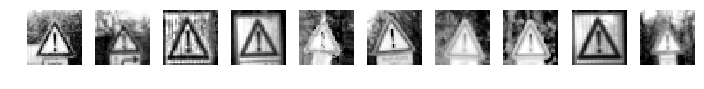

was misclassified as:
Traffic signals :


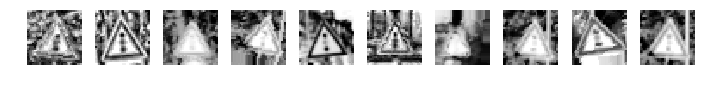

Double curve :


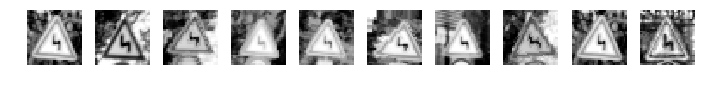

was misclassified as:
Wild animals crossing :


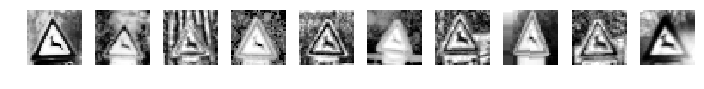

End of no passing by vechiles over 3.5 metric tons :


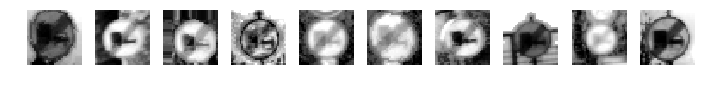

was misclassified as:
Go straight or right :


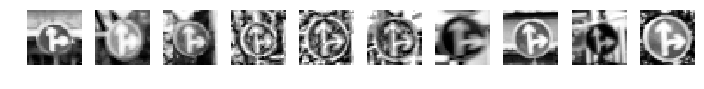

Children crossing :


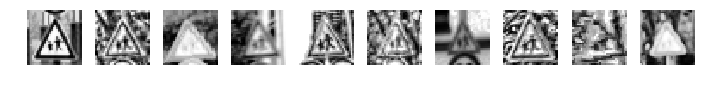

was misclassified as:
Pedestrians :


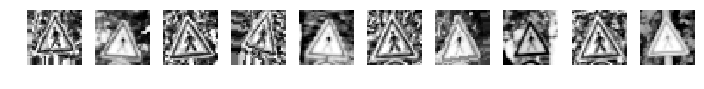

In [423]:

study_range = [27, 30, 11, 30, 18, 26, 21, 31, 42, 36,28,27]
compare = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1,0]
#study_range = [28,30,28,24,28,27]
#compare = [1,0,1,0,1,0]

implot = plt.figure(figsize=(12,4))
counter = 0
for classid in study_range:
    print (class_stats.SignName[classid],':')
    implot = plt.figure(figsize=(12,1))
    X_class = X_train[y_train==classid]
    #rnd_idx = np.random.random(range(len(X_class)), 10)
    rnd_idx=np.random.randint(0, high=len(X_class), size=10)

    for i in range(10):
        ax = implot.add_subplot(1,10,i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]].squeeze(),cmap='gray')
    plt.show()
    if compare[counter]:
        print ('was misclassified as:')
    counter += 1

In [439]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

# http://electronicimaging.spiedigitallibrary.org/data/journals/electim/927109/jei_22_4_041105_f010.png

#image1 = mpimg.imread('external-data/no-entry.png')

image1 = mpimg.imread('external-data/right-of-way.png')

#plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
#plotter.plot_image(image, 1, 3, 0)

#image2 = mpimg.imread('external-data/right-turn.png')

image2 = mpimg.imread('external-data/pedestrians_1.png')
#print('This image is:', type(image), 'with dimesions:', image.shape)
#plot_image(image, 1, 3, 0)
#actual.append([33, image])
#image3 = mpimg.imread('external-data/20kmph.png')

image3 = mpimg.imread('external-data/general_caution_1.png')
#plot_image(image, 1, 3, 0)
#actual.append([0, image])
#image4 = mpimg.imread('external-data/children-crossing.png')

image4 = mpimg.imread('external-data/children-crossing_1.png')
#plot_image(image, 1, 3, 0)
#actual.append([28, image])
#image5 = mpimg.imread('external-data/stop.png')

image5 = mpimg.imread('external-data/stop.png')
#plot_image(image, 1, 3, 0)
#actual.append([14, image])
#image6 = mpimg.imread('external-data/no-truck-passing.png')

image6 = mpimg.imread('external-data/no-truck-passing.png')
#plot_image(image, 1, 3, 0)
#actual.append([10, image])
X_test_new = [image1, image2, image3, image4, image5, image6]
y_test_new = [11,27,18,28,14,10]

In [440]:
from skimage import color, exposure, transform

def resize_data(data):
    print(np.asarray(data).shape)
    resize=[]
    # Histogram normalization in v channel
    for img in np.asarray(data):
        #print(img.shape)
        # central square crop
        
        # rescale to standard size
        img = transform.resize(img, (32, 32,3))
        import numpy, itertools


        #for i, j, k in itertools.product(*map(xrange, img.shape)):
        #img[k,i,j] = img [i,j,k]

        # roll color axis to axis 0
        #img = np.rollaxis(img, -1)
        resize.append(img)

    return np.asarray(resize)


#preprocess = reload(preprocess)
X_test_new_orig = np.copy(X_test_new)

#X_test_new = read_all_imgs()
X_test_new = resize_data(X_test_new)
print(X_test_new.shape)


X_test_new= preprocess.conv_to_grayscale_data(np.asarray(X_test_new))
#X_test_new = preprocess.hist_equalize(X_test_new)
X_test_new = preprocess.adaptive_equalize(X_test_new)
#X_test_new = preprocess.contrast_stretch(X_test_new)

(6,)


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(6, 32, 32, 3)


  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
100%|██████████| 6/6 [00:00<00:00, 45.51it/s]


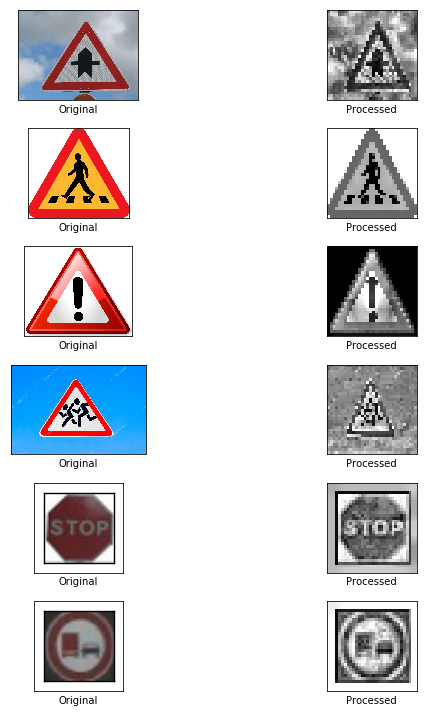

In [441]:
plotter = reload(plotter)
plotter.plot_2_datasets(X_test_new_orig.squeeze(),X_test_new.squeeze(),"Original", "Processed")


In [444]:
prob_new = model.predict(X_test_new)
preds_new = np.argmax(prob_new, axis=1)
print(y_test_new)
print(preds_new)

[11, 27, 18, 28, 14, 10]
[11 27 18 30 14 10]


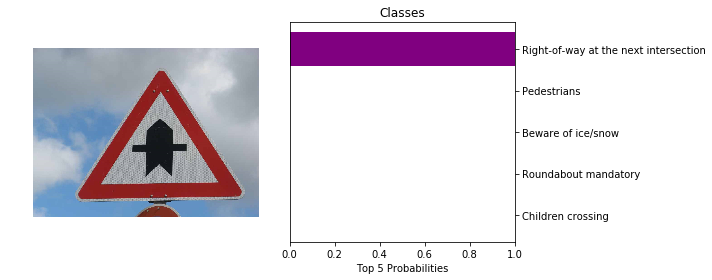

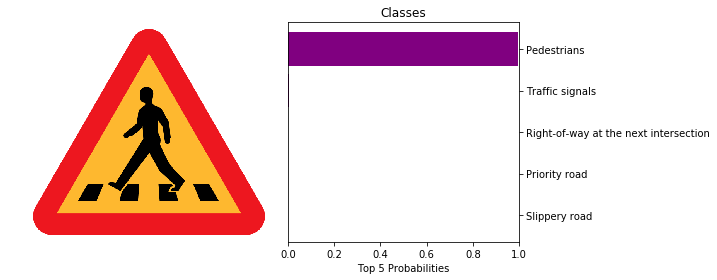

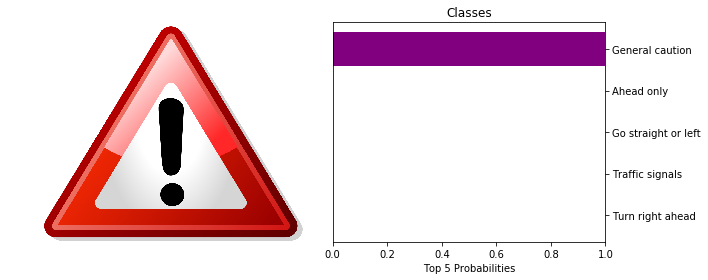

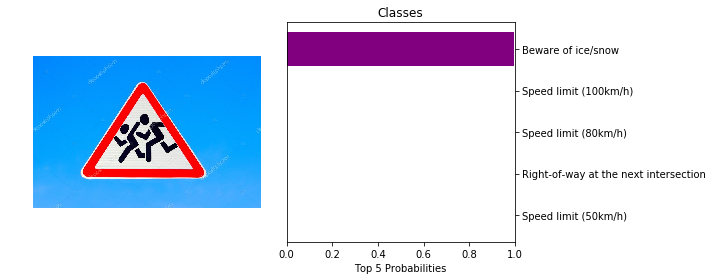

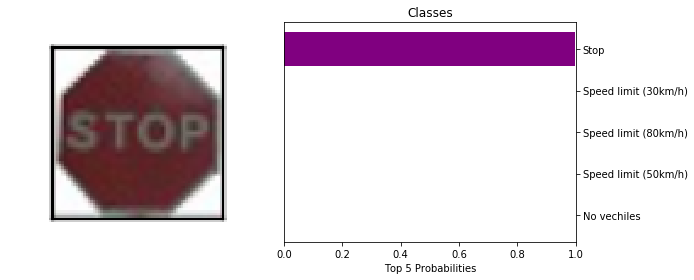

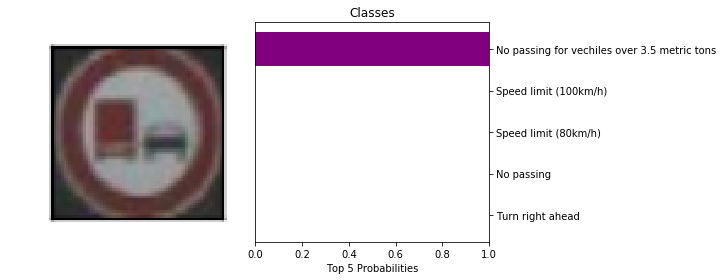

In [445]:
plotter.plot_top_n_preds(X_test_new_orig,prob_new,np.asarray(class_stats.SignName),5)


Children crossing :


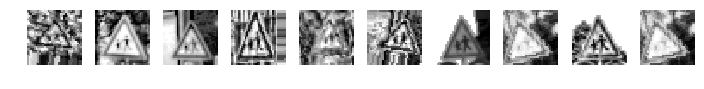

was misclassified as:
Beware of ice/snow :


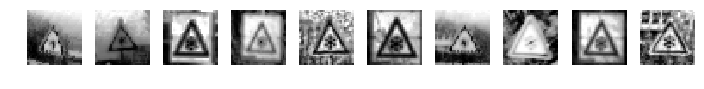

In [447]:

#study_range = [27, 30, 11, 30, 18, 26, 21, 31, 42, 36,28,27]
#compare = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1,0]
study_range = [28,30]
compare = [1,0]

implot = plt.figure(figsize=(12,4))
counter = 0
for classid in study_range:
    print (class_stats.SignName[classid],':')
    implot = plt.figure(figsize=(12,1))
    X_class = X_train[y_train==classid]
    #rnd_idx = np.random.random(range(len(X_class)), 10)
    rnd_idx=np.random.randint(0, high=len(X_class), size=10)

    for i in range(10):
        ax = implot.add_subplot(1,10,i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]].squeeze(),cmap='gray')
    plt.show()
    if compare[counter]:
        print ('was misclassified as:')
    counter += 1